# keras 기본 모델

In [1]:
import pandas as pd
feats = pd.read_csv('bank_data_feats.csv')
target = pd.read_csv('bank_data_target.csv')

In [2]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=test_size, random_state=random_state)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [4]:
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1]))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 34        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train['y'], epochs=10, validation_split=0.2)

Epoch 1/10
91/91 [==============================] - 0s 3ms/step - loss: 166.7563 - accuracy: 0.7863 - val_loss: 138.7352 - val_accuracy: 0.8052
Epoch 2/10
91/91 [==============================] - 0s 2ms/step - loss: 122.1805 - accuracy: 0.8015 - val_loss: 96.7612 - val_accuracy: 0.8287
Epoch 3/10
91/91 [==============================] - 0s 2ms/step - loss: 82.4459 - accuracy: 0.8216 - val_loss: 59.1696 - val_accuracy: 0.8453
Epoch 4/10
91/91 [==============================] - 0s 2ms/step - loss: 47.8691 - accuracy: 0.8354 - val_loss: 30.9619 - val_accuracy: 0.8605
Epoch 5/10
91/91 [==============================] - 0s 2ms/step - loss: 19.4287 - accuracy: 0.8375 - val_loss: 8.3765 - val_accuracy: 0.8287
Epoch 6/10
91/91 [==============================] - 0s 2ms/step - loss: 4.4588 - accuracy: 0.8195 - val_loss: 2.7027 - val_accuracy: 0.7735
Epoch 7/10
91/91 [==============================] - 0s 2ms/step - loss: 1.3480 - accuracy: 0.8492 - val_loss: 0.5978 - val_accuracy: 0.8771
Epoch 8/

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

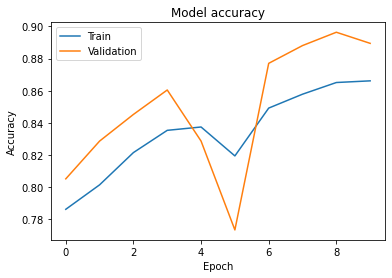

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

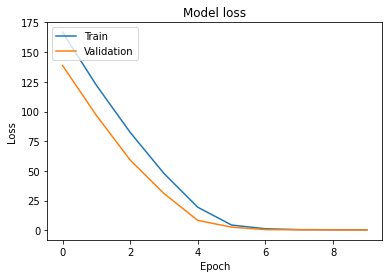

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test['y'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

29/29 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.8873
The loss on the test set is 0.3506 and the accuracy is 88.729%
